In [78]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import swagger_client
from swagger_client.rest import ApiException
from pprint import pprint

In [79]:
df= pd.read_csv('./../data/activities.csv')
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>',

In [80]:
df = df[df["Activity Type"] == "Run"]
df = df[["Elapsed Time",'Max Speed',"Moving Time","Distance"]]

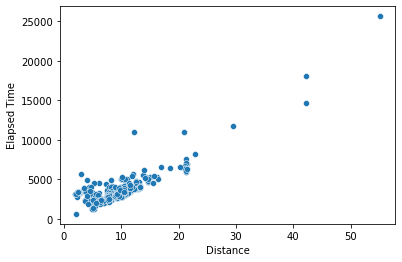

In [81]:
sns.scatterplot(data=df , x="Distance", y= "Elapsed Time")

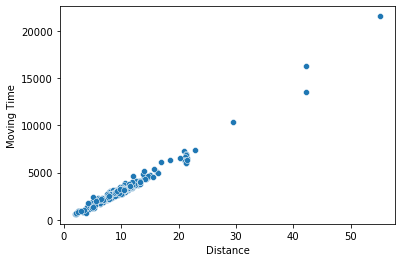

In [82]:
sns.scatterplot(data=df , x="Distance", y= "Moving Time")
# plt.ylim(0,10000)

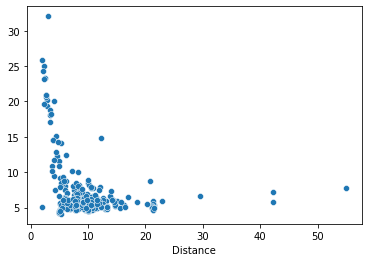

In [83]:
sns.scatterplot(x=df["Distance"] ,y= df["Elapsed Time"]/ df["Distance"]/60)

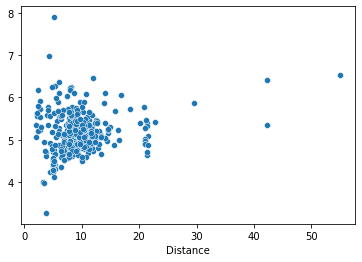

In [84]:
sns.scatterplot(x=df["Distance"] ,y= df["Moving Time"]/ df["Distance"]/60)

In [85]:
df.describe()

,Elapsed Time,Max Speed,Moving Time,Distance
count,398.000000,398.000000,398.000000,398.000000
mean,3533.949749,5.859790,2995.437186,9.625025
std,1939.261282,1.371693,1750.500324,4.971950
min,621.000000,3.300000,621.000000,2.010000
25%,2688.750000,4.800000,2284.500000,7.577500
50%,3272.000000,5.629993,2806.000000,9.240000
75%,3822.000000,6.600000,3336.750000,10.832500
max,25639.000000,11.175566,21532.000000,55.010000


In [86]:
df["Type"] = "Run"
df

,Elapsed Time,Max Speed,Moving Time,Distance,Type
1,2972,4.700000,2715.0,9.29,Run
3,5023,4.400000,3046.0,9.90,Run
5,1440,5.800000,1358.0,5.02,Run
6,3450,4.300000,3249.0,10.64,Run
8,6972,4.200000,6574.0,21.53,Run
...,...,...,...,...,...
462,3185,6.780078,2996.0,9.18,Run
463,2513,6.840039,2503.0,7.84,Run
464,3587,4.760000,3222.0,9.78,Run
465,3342,5.020020,3170.0,10.42,Run


In [87]:
# data1 = {
#     "Type": ["segment"],
#     "Distance": [2.05],
#     "Elapsed Time": [8*60 +24],
#     "Moving Time" : [8*60+24]
# }

# df = df.append( pd.DataFrame(data1))
# df
def add_new_result(time, distance,data_frame=df,type_of_assignment="Segment"):
    
    # data1 = {
    # "Type": [type],
    # "Distance": [distance],
    # "Elapsed Time": [time],
    # "Moving Time" : [time] 
    # }
    data_frame.loc[len(data_frame)] =  [time,None,time,distance,type_of_assignment]
    print(data_frame)
    return data_frame

    # return data_frame.append( pd.DataFrame(data1),ignore_index=True)

In [88]:
# Add segments
run_type = []
distance = []
time = []

run_type.append("Segment")
distance.append(2.05)
time.append(8*60 + 24)

run_type.append("Segment")
distance.append(0.54)
time.append(1*60 + 45)


run_type.append("Segment")
distance.append(0.54)
time.append(1*60 + 45)



# distance.append(8*60  +24 , 2.05,data_frame=df)
# distance.append(1*60  +45 , 0.54)
time.append(2*60 + 5)
time.append(1*60 + 37)
time.append(1*60 + 58)
time.append(1*60 + 51)
time.append(0*60 + 36)
time.append(0*60 + 57)
time.append(2*60 + 35)
time.append(2*60 + 0)
time.append(6*60 + 21)
time.append(0*60 + 57)
time.append(1*60 + 23)
time.append(2*60 + 17)
time.append(1*60 + 49)
time.append(1*60 + 50)
time.append(19*60 + 2)
time.append(1*60 + 55)
time.append(1*60 + 29)
time.append(1*60 + 6)
time.append(2*60 + 20)
time.append(0*60 + 18)
time.append(1*60 + 6)

distance.append( 0.57)
distance.append(0.49)
distance.append(0.6)
distance.append(0.59)
distance.append(0.27)
distance.append(0.35)
distance.append(0.63)
distance.append(0.57)
distance.append(1.51)
distance.append(0.32)
distance.append(0.46)
distance.append(0.65)
distance.append(0.55)
distance.append(0.41)
distance.append(4.48)
distance.append(0.59)
distance.append(0.49)
distance.append(0.4)
distance.append(0.67)
distance.append(0.11)
distance.append(0.4)

run_type = ["Segment"] * len(distance)
df_segmenty = {
    "Type": run_type,
    "Distance": distance,
    "Elapsed Time": time,
    "Moving Time": time
}
df = df.append(pd.DataFrame(df_segmenty), ignore_index=True)



In [89]:
# Rekordy 
distance = []
time = []
# # Add records (Estimated Best Effords)
distance.append(0.804)
distance.append(1)
distance.append(1.61)
distance.append(3.21)
distance.append(5)
distance.append(10)
distance.append(15)
distance.append(16.09)
distance.append(20)
distance.append(21.0975)
distance.append(30)
distance.append(42.195)

time.append(3*60  +12 )
time.append(2*60  +32 )
time.append(6*60  +13)
time.append(12*60  +56)
time.append(20*60  +39)
time.append(44*60  +28 )
time.append(9*60 + 1*3600  +40)
time.append(14*60 + 1*3600  +42)
time.append(32*60 + 1*3600  +56)
time.append(38*60 + 1*3600  +5)
time.append(47*60 + 2*3600  +50)
time.append(4*60 + 4*3600  +1 )
 
run_type = ["Records"] * len(distance)
df_rekordy = {
    "Type": run_type,
    "Distance": distance,
    "Elapsed Time": time,
    "Moving Time": time
}
df = df.append(pd.DataFrame(df_rekordy), ignore_index=True)

In [90]:
distance = []
time = []

distance.append(0.2)
time.append(33)
distance.append(0.4)
time.append(1*60 + 6 )

run_type = ["Lap"] * len(distance)
df_lap = {
    "Type": run_type,
    "Distance": distance,
    "Elapsed Time": time,
    "Moving Time": time
}
df = df.append(pd.DataFrame(df_lap), ignore_index=True)

In [91]:
df[df["Type"]=="Records"]

,Elapsed Time,Max Speed,Moving Time,Distance,Type
422,192,NaN,192.0,0.8040,Records
423,152,NaN,152.0,1.0000,Records
424,373,NaN,373.0,1.6100,Records
425,776,NaN,776.0,3.2100,Records
426,1239,NaN,1239.0,5.0000,Records
427,2668,NaN,2668.0,10.0000,Records
428,4180,NaN,4180.0,15.0000,Records
429,4482,NaN,4482.0,16.0900,Records
430,5576,NaN,5576.0,20.0000,Records
431,5885,NaN,5885.0,21.0975,Records


In [92]:
df

,Elapsed Time,Max Speed,Moving Time,Distance,Type
0,2972,4.7,2715.0,9.2900,Run
1,5023,4.4,3046.0,9.9000,Run
2,1440,5.8,1358.0,5.0200,Run
3,3450,4.3,3249.0,10.6400,Run
4,6972,4.2,6574.0,21.5300,Run
...,...,...,...,...,...
431,5885,NaN,5885.0,21.0975,Records
432,10070,NaN,10070.0,30.0000,Records
433,14641,NaN,14641.0,42.1950,Records
434,33,NaN,33.0,0.2000,Lap


In [94]:
df.to_csv('../data/running_data.csv', index=False)